In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data = pd.read_json("clustered.json")
data.drop(["in_reply_to_user_id_str","is_retweet","text","modded_text","modded1","year","date"],axis=1,inplace=True)
data

,favorite_count,retweet_count,month,hour,week_year,noTags_punct,modded1_stemmed,labels
25967,6735,2108,1,0,53,i will be on foxnews live with members of my f...,foxnew live member famili 1150 pm ring ...,3
25968,8581,3460,1,3,53,happy new year amp thank you,happi new year amp thank,0
25970,8258,1948,1,6,53,happy new year from thank you to my great fa...,happi new year thank great famili support,0
25971,7490,2721,1,6,53,jallenaip hillary said she was in a fog of war...,jallenaip hillari said fog war explan l...,2
25972,3330,933,1,21,53,sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,2
25973,8495,2642,1,23,53,well the year has officially begun i have many...,well year offici begun mani stop plan ...,3
25974,2780,654,1,23,53,marie7777777777 realdonaldtrump we love u to t...,marie7777777777 realdonaldtrump love u tr...,0
25975,3066,893,1,23,53,jodil792 we are standing with you spreading th...,jodil792 stand spread wordtrump presid 2...,0
25976,3492,881,1,23,53,memeoryhead im one of your biggest fans mr tru...,memeoryhead im one biggest fan mr trump...,0
25977,3346,922,1,23,53,casuperrunner huckabee is a good manbut he n...,casuperrunn huckabe good manbut need get...,2


In [3]:
data.corr()

,favorite_count,retweet_count,month,hour,week_year,labels
favorite_count,1.000000,0.908397,0.464811,0.003317,0.443658,0.060065
retweet_count,0.908397,1.000000,0.421107,0.015665,0.400986,0.027518
month,0.464811,0.421107,1.000000,-0.049998,0.936428,-0.005117
hour,0.003317,0.015665,-0.049998,1.000000,-0.043332,-0.003687
week_year,0.443658,0.400986,0.936428,-0.043332,1.000000,-0.009679
labels,0.060065,0.027518,-0.005117,-0.003687,-0.009679,1.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

vect = TfidfVectorizer()

for label in data["labels"].unique().tolist():
    x = vect.fit_transform(data[data["labels"] == label]["modded1_stemmed"])
    df = pd.DataFrame(x.toarray() , columns = vect.get_feature_names())
    
    true_k = 20
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
    model.fit(x)
    print(model.inertia_)
    #con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
    print("Top terms per cluster: ", label)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vect.get_feature_names()

#    for i in range(true_k):
#        print("Cluster %d:" % i),
#        for ind in order_centroids[i, :10]:
#            print(' %s' % terms[ind]),
#        print


In [ ]:
df

In [35]:
x1 = data[data["labels"] == 1]
print(len(x1))
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(),
                      columns=feat_names)
    return(df)
  
# set of documents
corpora = ['The quick brown fox.','Jumps over the lazy dog!']

corpus = x1["modded1_stemmed"].tolist()

# instantiate the vectorizer object
cvec = TfidfVectorizer()

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpus)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
c = wm2df(wm, tokens)
c

1078


,08,10,100,1000,1000000,100000000,100pm,1018,106,108,...,youngstown,your,youth,yr,yup,zero,zilch,zogbi,zucker,zuckerman
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.353221,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x1.reset_index(inplace=True,drop=True)
res = pd.concat([x1,c], axis=1)
res1 = res.drop(["noTags_punct","modded1_stemmed","labels"],axis=1)
res

,favorite_count,retweet_count,month,hour,week_year,noTags_punct,modded1_stemmed,labels,08,10,...,youngstown,your,youth,yr,yup,zero,zilch,zogbi,zucker,zuckerman
0,10339,3759,1,23,53,the person that hillary clinton least wants to...,person hillari clinton least want run f...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5802,2124,1,12,53,jebbush is a sad case a total embarrassment to...,jebbush sad case total embarrass famili ...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5458,1749,1,12,53,jebbush is a low energy stiff who should focus...,jebbush low energi stiff focu special i...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6688,2682,1,14,53,alshabbab not isis just made a video on me th...,alshabbab isi made video frontrunn amp ...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6775,2560,1,17,53,does anybody remember when bill clinton in 200...,anybodi rememb bill clinton 2008 work l...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3861,1343,1,18,53,chucktodd said today on meetthepress that atta...,chucktodd said today meetthepress attack ...,1,0.353221,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3733,984,1,19,53,ruthmarcus of the washingtonpost was terrible ...,ruthmarcu washingtonpost terribl today fa...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2732,772,1,19,53,barbaraslavin1 washingtonpost bashing distin...,barbaraslavin1 washingtonpost bash disting...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5338,2525,1,20,53,iran with all of the money and all else given ...,iran money els given obama want way ta...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9300,3403,1,23,53,the worst thing hillary could do is have her h...,worst thing hillari could husband campai...,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.cluster import KMeans

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(res1)
print(model.inertia_)
print
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster 0: ")
from sklearn.metrics import silhouette_score
labels = model.labels_
res1["labels"] = labels
d = silhouette_score(res1, labels,metric='euclidean')
print(d)

202674779855.52386
Top terms per cluster 0: 
0.6886700153945917


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


0 940


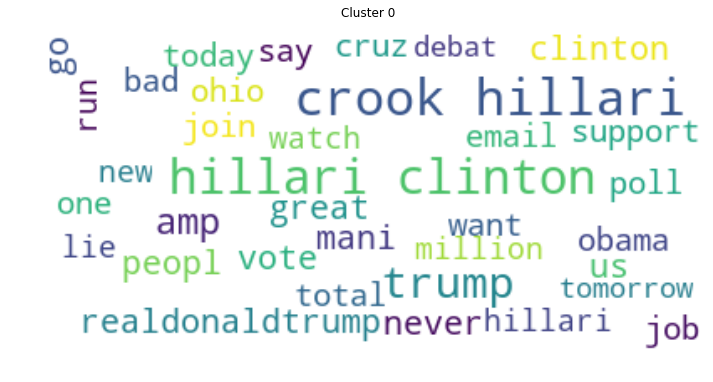

1 137


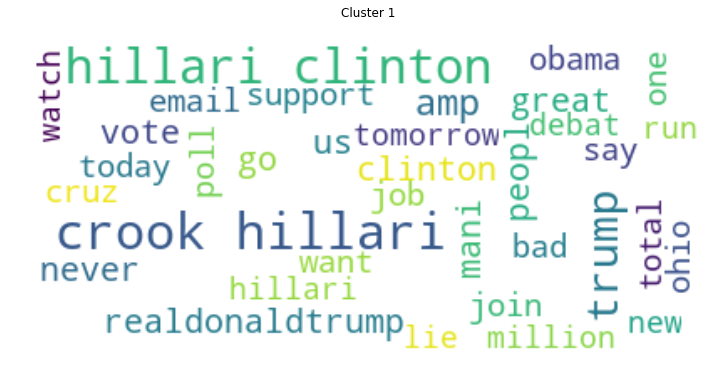

2 1


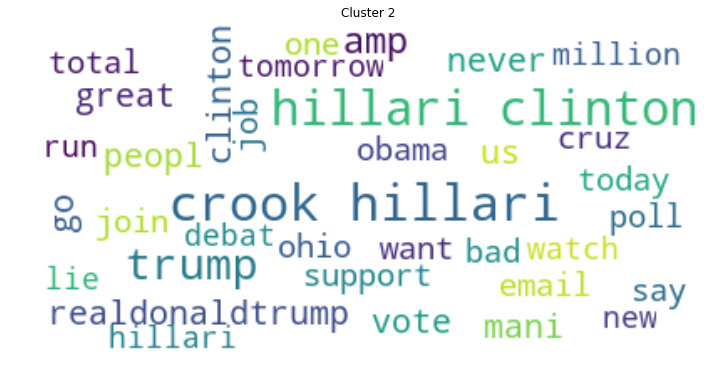

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in range(0,true_k):
    print(c,len(res1[res1["labels"]==c]))
    text = res["modded1_stemmed"]
    text = text.str.cat(sep=' ')

    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [52]:
res[res1["labels"] == 1]["noTags_punct"].tolist()

['the organized group of people many of them thugs who shut down our first amendment rights in chicago have totally energized america',
 'why is it that the horrendous protesters who scream curse punch shut down roadsdoors during my rallies are never blamed by media sad',
 'crooked hillary wants to get rid of all guns and yet she is surrounded by bodyguards who are fully armed no more guns to protect hillary',
 'obama just endorsed crooked hillary he wants four more years of obama but nobody else does',
 'i rarely agree with president obama however he is 100 correct about crooked hillary clinton great ad  ',
 'what has happened in orlando is just the beginning our leadership is weak and ineffective i called it and asked for the ban must be tough',
 'america first',
 'hillary says this election is about judgment shes right her judgement has killed thousands unleashed isis and wrecked the economy',
 'how can hillary run the economy when she cant even send emails without putting entire na